In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

### Details

We let $X_j \sim \mathcal{N}(\mu_j, \sigma_j^2)$ for $j=1,2,3$. We test $H_j: \mu_j \leq 0$ at level $\alpha$ for each $j$ and report the expected utility as $\mu_j \times \text{power}$. Then we test each $H_j$ at level $\alpha / 3$ and report $E[\mu_{j^*}]$ where $j^*$ is the largest index we can reject and $\mu_{j^*} = 0$ if we can't reject. We vary $n$.

In [3]:
FIGURE_SAVEPATH = "../../../figures/"
SAVELABEL = "bonferroni_aggregation_demo"

SAVE = True

In [4]:
sig_size = np.array([1.5, 1, 0.75]) / np.sqrt(25)
mu = np.array([0.25,0.3,0.35])
sigma = mu / sig_size
n_space = np.linspace(5,500,20).astype(int)
alpha = 0.05
n_sims = 10000

In [5]:
print("mu = {}".format(mu))
print("sigma = {}".format(sigma))

mu = [0.25 0.3  0.35]
sigma = [0.83333333 1.5        2.33333333]


In [6]:
all_power = []
all_utility = []
all_bonf_power = []
all_bonf_utility = []
for n in n_space:
    print("Processing n = {}".format(n))
    per_n_rejections = []
    per_n_bonf_rejections = []
    for _ in range(n_sims):
        # Sample
        X = mu + sigma * np.random.normal(size=(n,3))
        # Test
        zscore = np.sqrt(n) * X.mean(axis=0) / sigma
        pval = scipy.stats.norm.sf(zscore)
        rejections = (pval <= alpha)
        bonf_rejections = (pval <= (alpha / 3))
        per_n_rejections.append(rejections)
        per_n_bonf_rejections.append(bonf_rejections)
    per_n_rejections = np.array(per_n_rejections)
    per_n_bonf_rejections = np.array(per_n_bonf_rejections)
    # Calculate metrics: power, bonf power, utility, bonf utility
    all_power.append(per_n_rejections.mean(axis=0))
    all_utility.append((per_n_rejections * mu).mean(axis=0))
    all_bonf_power.append(per_n_bonf_rejections.mean())
    all_bonf_utility.append((per_n_bonf_rejections * mu).max(axis=1).mean())
all_power = np.array(all_power)
all_utility = np.array(all_utility)
all_bonf_power = np.array(all_bonf_power)
all_bonf_utility = np.array(all_bonf_utility)

Processing n = 5
Processing n = 31
Processing n = 57
Processing n = 83
Processing n = 109
Processing n = 135
Processing n = 161
Processing n = 187
Processing n = 213
Processing n = 239
Processing n = 265
Processing n = 291
Processing n = 317
Processing n = 343
Processing n = 369
Processing n = 395
Processing n = 421
Processing n = 447
Processing n = 473
Processing n = 500


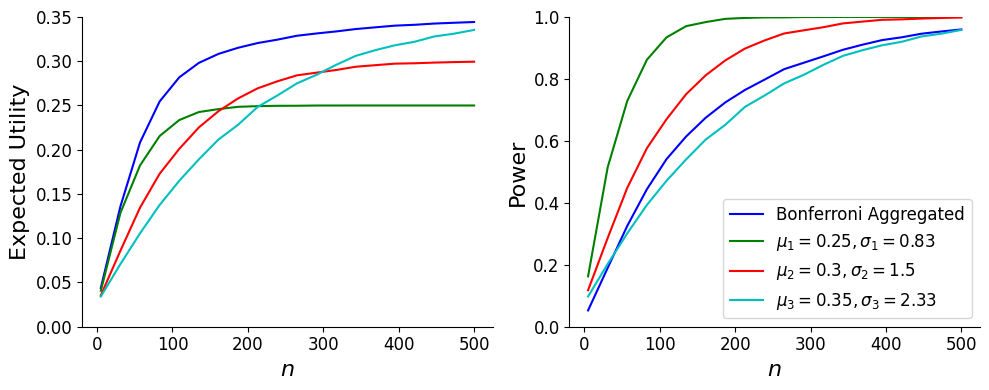

In [7]:
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

fig, ax = plt.subplots(1,2,figsize=(10,4))

LABEL_FONTSIZE = 16
TICK_FONTSIZE = 12
LEGEND_FONTSIZE = 12

ax[0].plot(n_space, all_bonf_utility, label="Bonferroni Aggregated")
for j in range(3):
    ax[0].plot(n_space, all_utility[:,j], label=r"$\mu_{} = {}, \sigma_{} = {}$".format(j+1, mu[j], j+1, np.round(sigma[j], 2)))
ax[0].set_ylim(0,max(mu))
ax[0].set_xlabel(r"$n$", fontsize=LABEL_FONTSIZE)
ax[0].set_ylabel(r"Expected Utility", fontsize=LABEL_FONTSIZE)
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

ax[1].plot(n_space, all_bonf_power, label="Bonferroni Aggregated")
for j in range(3):
    ax[1].plot(n_space, all_power[:,j], label=r"$\mu_{} = {}, \sigma_{} = {}$".format(j+1, mu[j], j+1, np.round(sigma[j], 2)))
ax[1].set_ylim(0,1)
ax[1].set_xlabel(r"$n$", fontsize=LABEL_FONTSIZE)
ax[1].set_ylabel(r"Power", fontsize=LABEL_FONTSIZE)
ax[1].spines[['right', 'top']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax[1].legend(fontsize=LEGEND_FONTSIZE)

plt.tight_layout()

# Save
if SAVE:
    plt.savefig(FIGURE_SAVEPATH + "{}.pdf".format(SAVELABEL), bbox_inches="tight", dpi=300)

plt.show()